In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from matplotlib import animation
from matplotlib.animation import PillowWriter
import imageio

import scienceplots
plt.style.use(['science', 'notebook', 'grid']) 
plt.rcParams['figure.figsize'] = [10 , 10]

# Units

In [4]:
G_pu = 6.67430e-8       #cm^3 g^-1 s^-2
r_pu = 1.49597870707e13 #cm
m_pu = 1.989e33         #g

v_pu = np.sqrt(G_pu * m_pu / r_pu) #cm/s

time_pu = r_pu/v_pu #seconds

E_pu = G_pu*(m_pu**2)/r_pu #cm^2 g s^-2 = erg

Rescaling

In [5]:
v_pu = v_pu/1e5 #km/s
print(f"v_pu/v_iu = {v_pu:.2f} (km/s)/iu")

time_pu = time_pu/(3.156e7) #years
print(f"time_pu/time_iu = {time_pu:.3f} years/iu")

E_pu 
print(f"E_pu/E_iu = {E_pu:.2e} erg/iu")

v_pu/v_iu = 29.79 (km/s)/iu
time_pu/time_iu = 0.159 years/iu
E_pu/E_iu = 1.77e+46 erg/iu


# Plot & Animation

In [6]:
data = np.loadtxt('./sphere_real.out')

time = data[:, 0]
x = data[:, 1::6].T
y = data[:, 2::6].T
z = data[:, 3::6].T
vx = data[:, 4::6].T
vy = data[:, 5::6].T
vz = data[:, 6::6].T
N = len(x[:, 0])

Collapse time

In [7]:
def Dist(x1, y1, z1, x2, y2, z2):
    return np.linalg.norm(np.array([x1-x2, y1-y2, z1-z2]), axis=0)

dist = np.zeros(len(time))

for i in range(len(x[:, 0])):
    for j in range(len(x[:, 0])):
        dist = dist + Dist(x[i, :], y[i, :], z[i], x[j], y[j], z[j])

In [8]:
T_collapse = time[np.argsort(dist)[0]]
T_collapse

37.0001429965322

### Plot

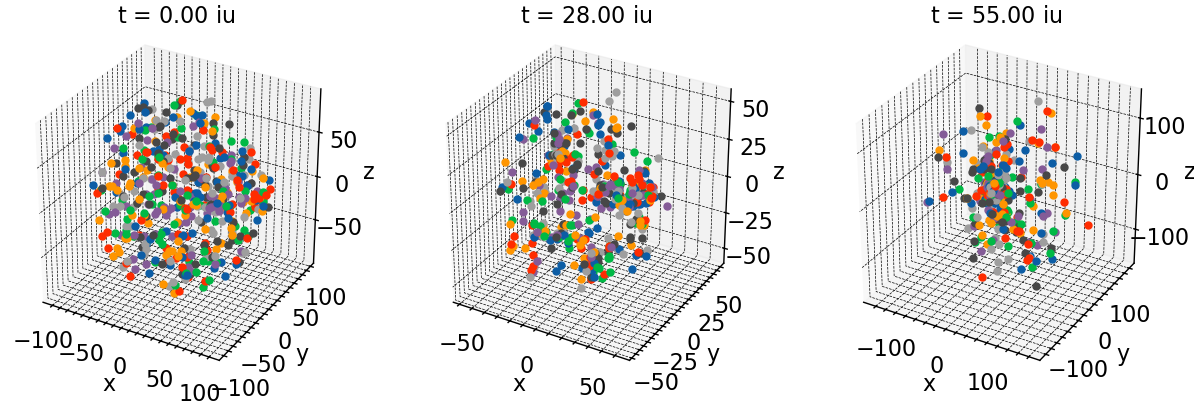

In [51]:
plt.rcParams['figure.figsize'] = [15 , 10]

fig, axes = plt.subplots(1, 3, subplot_kw={'projection':'3d'})

ax = axes[0]
ax.set_box_aspect([1, 1, 1])
ax.set_title(f't = ${time[0]:.2f}$ iu')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
for i in range(len(x[:,])):
    ax.plot3D(x[i, 0], y[i, 0], z[i, 0], 'o', markersize=5)
    
ax = axes[1]
ax.set_box_aspect([1, 1, 1])
ax.set_title(f't = ${time[round(0.5*len(time))]:.2f}$ iu')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
for i in range(len(x[:,])):
    ax.plot3D(x[i, np.argsort(time)[round(0.5*len(time))]], y[i, np.argsort(time)[round(0.5*len(time))]], z[i, np.argsort(time)[round(0.5*len(time))]], 'o', markersize=5)
    
ax = axes[2]
ax.set_box_aspect([1, 1, 1])
ax.set_title(f't = ${time[-1]:.2f}$ iu')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
for i in range(len(x[:,])):
    ax.plot3D(x[i, -1], y[i, -1], z[i, -1], 'o', markersize=5)

### Animation

In [41]:
# if len(x)=N, then the animation will have N/k frames
k = 1

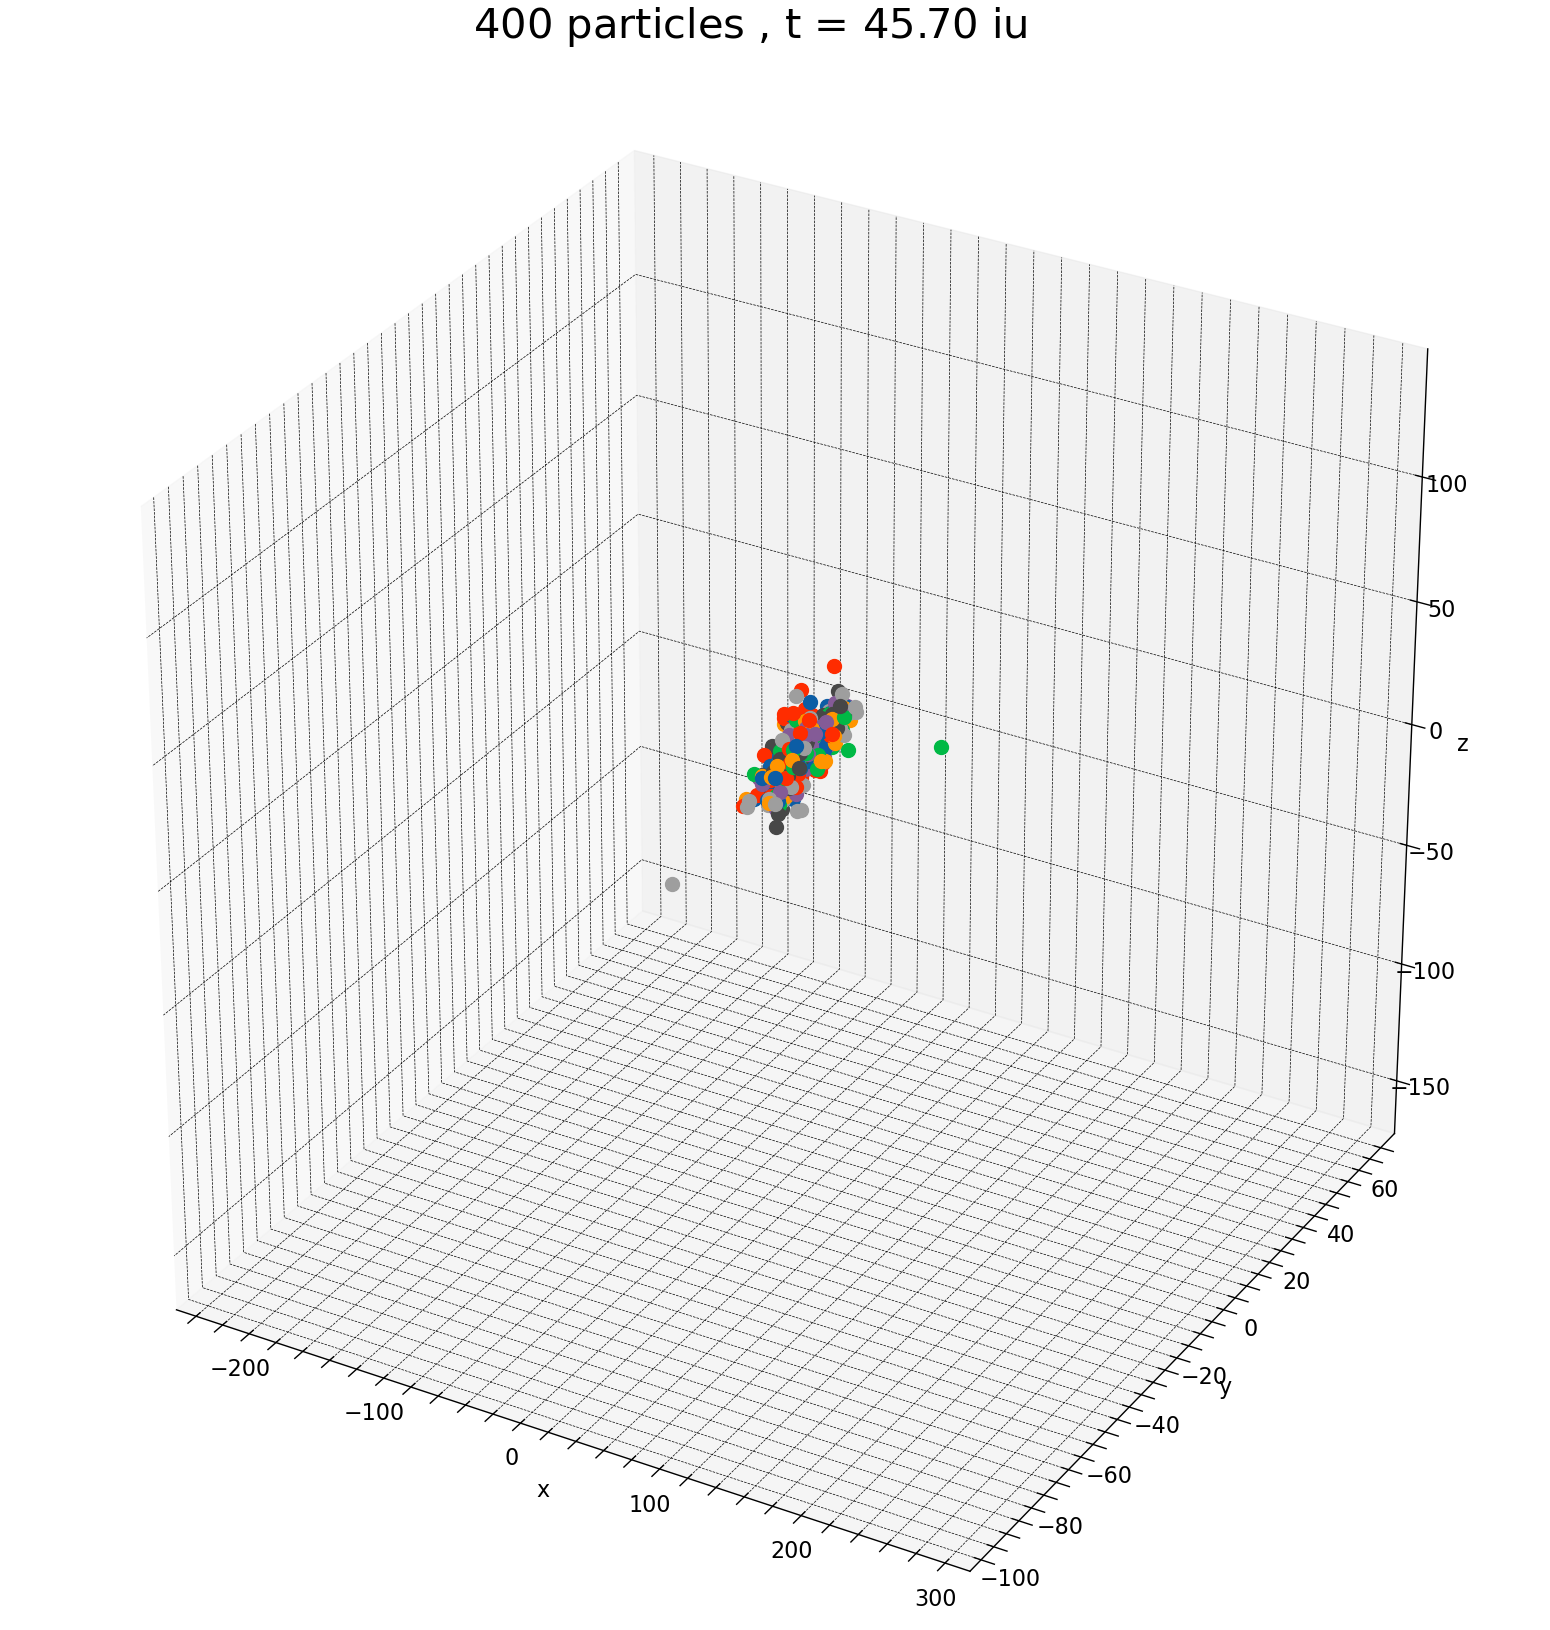

In [42]:
plt.rcParams['figure.figsize'] = [20 , 20]

#fig = plt.Figure() #somehow faster than fig, ax = plt.subplots(1,1), but text doesn't work well
#ax = fig.add_subplot()
fig, axes = plt.subplots(1, 1, subplot_kw={'projection':'3d'})
ax = axes
title = fig.suptitle(f'{N} particles', fontsize=30, y=0.92)

def animate(i):
    print(math.ceil(100*i*k/len(x[0])), "%", end='\r')
    
    ax.clear()
    ax.set_box_aspect([1, 1, 1])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim(1.2*np.min(x), 1.2*np.max(x))
    ax.set_ylim(1.2*np.min(y), 1.2*np.max(y))
    ax.set_zlim(1.2*np.min(z), 1.2*np.max(z))
    title.set_text(f'${N}$ particles , t = ${time[k*i]:.2f}$ iu')
    
    for j in range(len(x[:,])):
        ax.plot3D(x[j, k*i], y[j, k*i], z[j, k*i], 'o', markersize=10)    
    return fig,

#plt.savefig("C:/cygwin64/home/nbody_simulations/sphere_collapse/image{:03}.png".format(j))
#plt.close()
writer = animation.FFMpegWriter(fps=60)
ani = animation.FuncAnimation(fig, animate, frames=int(len(x[0])/k), interval=1, blit=True)
ani.save('sphere.gif', writer=writer, dpi=100)

How the density distribution evolves during the collapse? Here below a code that represents positions of particles at various times and computes the density profile of the collapsing sphere. It then plots the density profile as a function of radial distance from the center of the sphere.

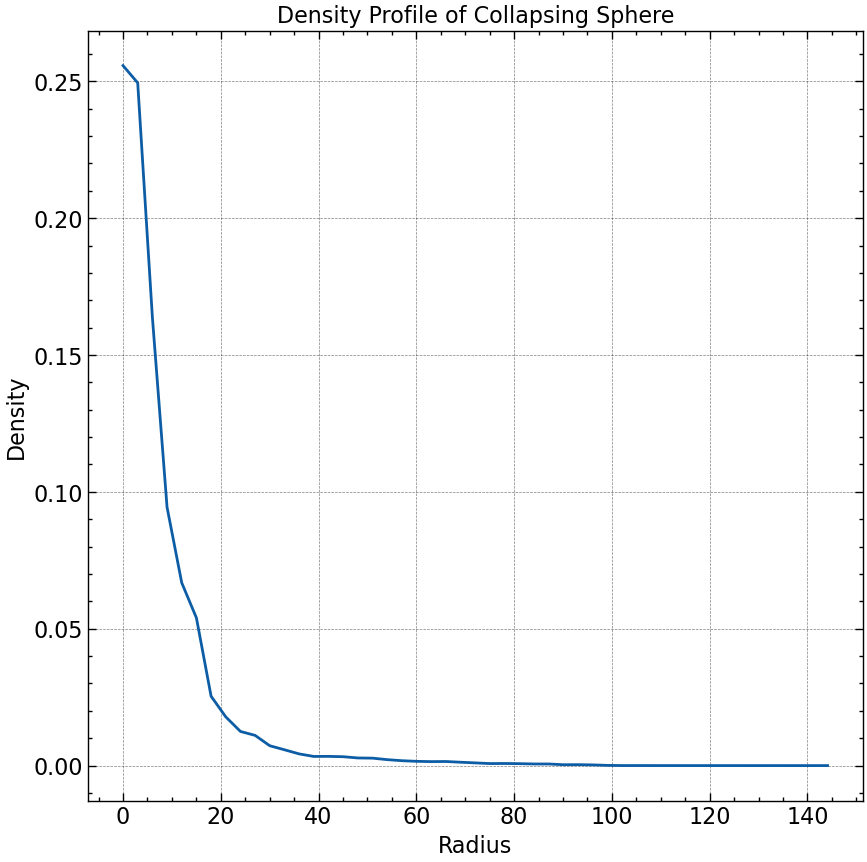

In [15]:
# Density profile
def compute_density_profile(positions, T_collapse, time, bins=50):
    # Calculate radial distance from the origin
    def R(x1, y1, z1):
        return np.linalg.norm(np.array([x1, y1, z1]), axis=0)
    radial_distance = R(x,y,z)
    # Define radial bins
    r_bins = np.linspace(0, np.max(radial_distance[:find_index(time, T_collapse)]), bins)
    
    
    # Compute histogram of radial distances
    hist, _ = np.histogram(radial_distance[:find_index(time, T_collapse)], bins=r_bins)

    # Compute volume of each shell (assuming spherical symmetry)
    shell_volumes = 4/3 * np.pi * (r_bins[1:]**3 - r_bins[:-1]**3)

    # Compute density as number of particles within each shell divided by volume
    density_profile = hist / shell_volumes

    return r_bins[:-1], density_profile


# Assuming positions is a 3D numpy array with dimensions (time_steps, num_particles, 3)
# Each row in positions represents (x, y, z) coordinates of a particle

positions = np.stack((x, y, z), axis=-1)

# Compute density profile
r_bins, density_profile = compute_density_profile(positions.reshape(-1, 3), T_collapse, time)

# Plot density profile
plt.figure()
plt.plot(r_bins, density_profile)
#plt.xlim(-5, 125)
plt.xlabel('Radius')
plt.ylabel('Density')
plt.title('Density Profile of Collapsing Sphere')
plt.grid(True)
plt.show()


In [13]:
for t in range(len(time)):
    np.max(radial_distance[:find_index(time, T_collapse)])
    print(np.max(radial_distance[:find_index(time, T_collapse)]))

NameError: name 'radial_distance' is not defined

In [30]:
np.max(radial_distance[:find_index(time, T_collapse)])

1036.0468465405318

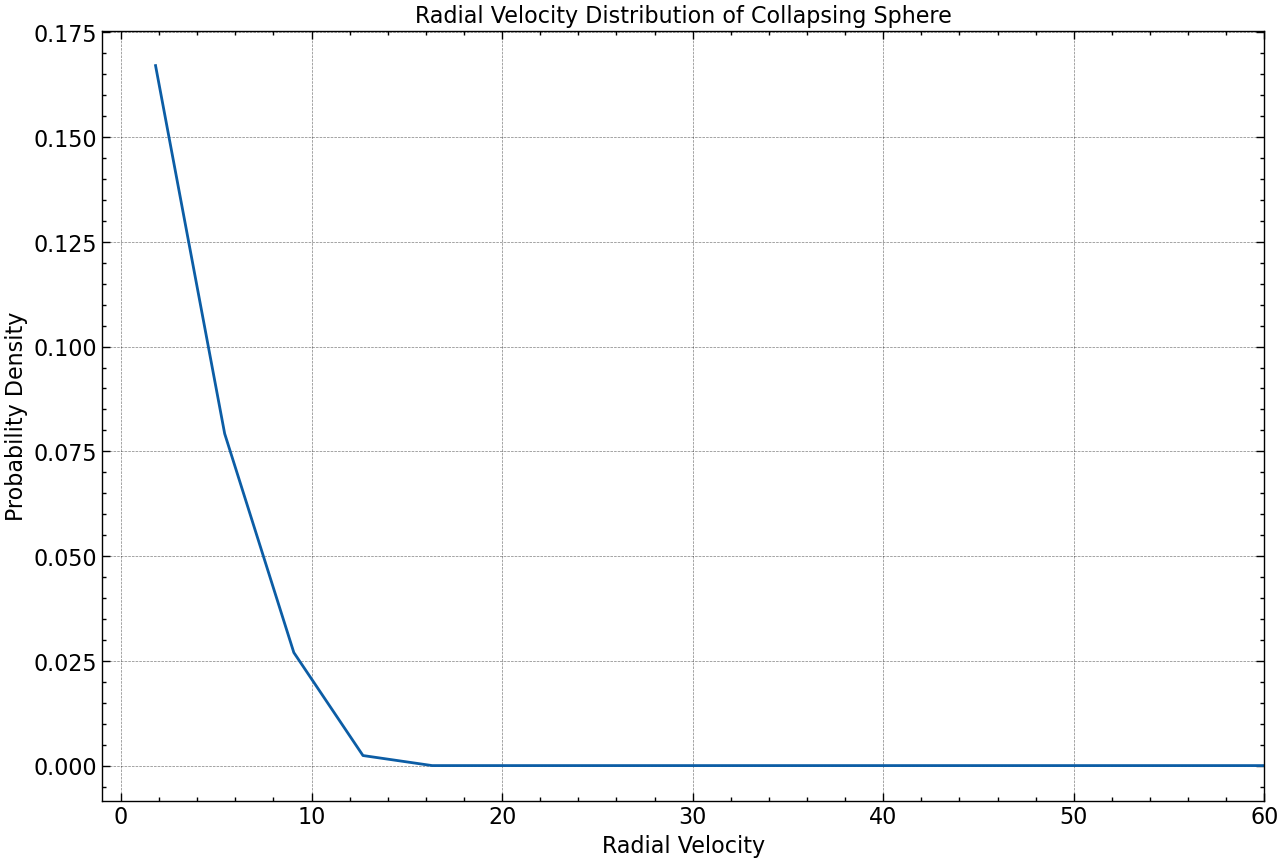

In [56]:
#check the radius!!!
# Function to compute radial velocity distribution
def compute_radial_velocity_distribution(positions, velocities, bins=50):
    # Calculate radial distance from the origin
    radial_distance = np.linalg.norm(positions, axis=1)

    # Calculate radial velocity component (dot product of position and velocity)
    radial_velocity = np.sum(positions * velocities, axis=1) / radial_distance

    # Define radial bins
    r_bins = np.linspace(0, np.max(radial_distance), bins)

    # Compute histogram of radial velocities
    hist, _ = np.histogram(radial_velocity, bins=r_bins)

    # Normalize histogram
    bin_centers = 0.5 * (r_bins[1:] + r_bins[:-1])
    bin_width = r_bins[1] - r_bins[0]
    radial_velocity_distribution = hist / (bin_width * np.sum(hist))

    return bin_centers, radial_velocity_distribution

positions = np.stack((x, y, z), axis=-1)
velocities = np.stack((vx, vy, vz), axis=-1)

# Compute radial velocity distribution
bin_centers, radial_velocity_distribution = compute_radial_velocity_distribution(positions.reshape(-1, 3), velocities.reshape(-1, 3))

# Plot radial velocity distribution
plt.figure()
plt.plot(bin_centers, radial_velocity_distribution)
plt.xlim(-1, 60)
plt.xlabel('Radial Velocity')
plt.ylabel('Probability Density')
plt.title('Radial Velocity Distribution of Collapsing Sphere')
plt.grid(True)
plt.show()


In [12]:
#radial_distance = np.linalg.norm(positions, axis=0)
def find_index(s, value):
    for i in range(len(s)):
        if s[i] == value:
            return i
"""tt = []
for i in range(len(radial_distance)):
    if time[find_index(radial_distance, radial_distance[i])] <= T_collapse:
        tt.append(time[find_index(radial_distance, radial_distance[i])])"""

   

'tt = []\nfor i in range(len(radial_distance)):\n    if time[find_index(radial_distance, radial_distance[i])] <= T_collapse:\n        tt.append(time[find_index(radial_distance, radial_distance[i])])'

In [ ]:
plt.figure()
plt.plot(tt,r_bins)
plt.xlim(-1, 60)
plt.xlabel('Time')
plt.ylabel('Radius')
plt.title('Radius vs time')
plt.grid(True)
plt.show() 